In [25]:
!pip install scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 547.6 kB/s eta 0:00:17
                                              0.1/9.2 MB 547.6 kB/s eta 0:00:17
                                              0.1/9.2 MB 547.6 kB/s eta 0:00:17
                                              0.1/9.2 MB 547.6 kB/s eta 0:00:17
     -                                        0.2/9.2 MB 554.9 kB/s eta 0:00:17
     -                                        0.2/9.2 MB 554.9 kB/s eta 0:00:17
     -                                        0.2/9.2 MB 554.9 kB/s eta 0:00:17
     -                                        0.2/9.2 MB 554.9 kB/s eta 0:00:17
     

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [11]:
df= pd.read_csv(r'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [12]:
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [13]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [14]:
df.shape

(2035, 8)

In [15]:
df.info

<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                

In [16]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [17]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [18]:
new_df= pd.read_csv(r'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv', parse_dates=['Date'])

sorting data


In [19]:
new_df['Date']= pd.to_datetime(new_df['Date'], errors='coerce')
print (type(new_df.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
new_df.sort_values(by=['Date'], inplace=True, ascending=True)
new_df.Date.head()

2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
Name: Date, dtype: datetime64[ns]

Data visualization

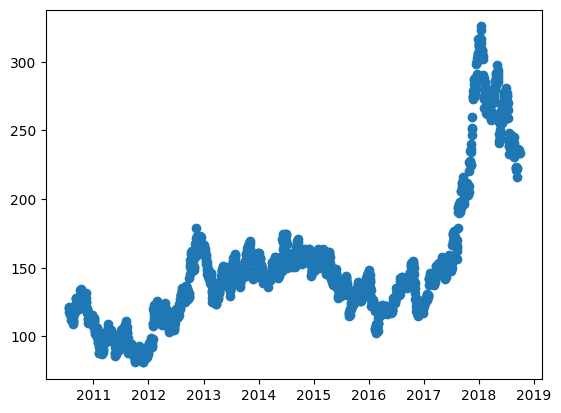

In [27]:
fig,ax=plt.subplots()
ax.scatter(new_df.Date, new_df.Close)

In [28]:
new_df.reset_index(inplace=True)
new_df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [29]:
close_df=new_df['Close']
close_df

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [30]:
close_df.shape

(2035,)

In [31]:
close_df.size

2035

Min Max Scaler

In [32]:
scaler=MinMaxScaler(feature_range=(0,1))
close_df=scaler.fit_transform(np.array(close_df).reshape(-1,1))
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Train and Test Split

In [33]:
training_size=int(len(close_df)*0.7)
test_size=len(close_df)-training_size
train_data, test_data=close_df[0:training_size,:], close_df[training_size:len(close_df),:1]

In [34]:
train_data.shape, close_df.shape

((1424, 1), (2035, 1))

In [35]:
test_data.shape

(611, 1)

In [36]:
type(test_data)

numpy.ndarray

In [39]:
import numpy as np
def create_dataset(dataset, time_step=1):
    dataX=[]
    dataY=[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
        return np.array(dataX), np.array(dataY)


In [40]:
    time_step=100
    X_train, y_train= create_dataset(train_data, time_step)
X_test, y_test= create_dataset(test_data, time_step)

In [41]:
X_test, y_test= create_dataset(test_data, time_step)
   

In [42]:
y_train.shape

(1,)

In [43]:
X_train.shape

(1, 100)

In [44]:
print(X_test.shape), print(y_test.shape)

(1, 100)
(1,)


(None, None)

In [45]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
M= Sequential()
M.add(LSTM(50, return_sequences=True,input_shape=(time_step,1)))
M.add(LSTM(50,return_sequences=True))
M.add(LSTM(50))
M.add(Dense(1))
M.compile(loss='mean_squared_error', optimizer='adam')

In [47]:
M = Sequential()
M.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
M.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
M.add(LSTM(50))
M.add(Dense(1))
M.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')

In [48]:
M.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
M.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =100, batch_size = 64, verbose = 1);

Epoch 1/100
1/1 [==============================] - 19s 19s/step - loss: 0.0153 - acc: 0.0000e+00 - val_loss: 0.0488 - val_acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 211ms/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.0359 - val_acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 214ms/step - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0239 - val_acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 208ms/step - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0129 - val_acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 211ms/step - loss: 1.1458e-04 - acc: 0.0000e+00 - val_loss: 0.0047 - val_acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 218ms/step - loss: 7.2785e-04 - acc: 0.0000e+00 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 217ms/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 8/100
1/1 [===

#### Evaluation of constructed LSTM model


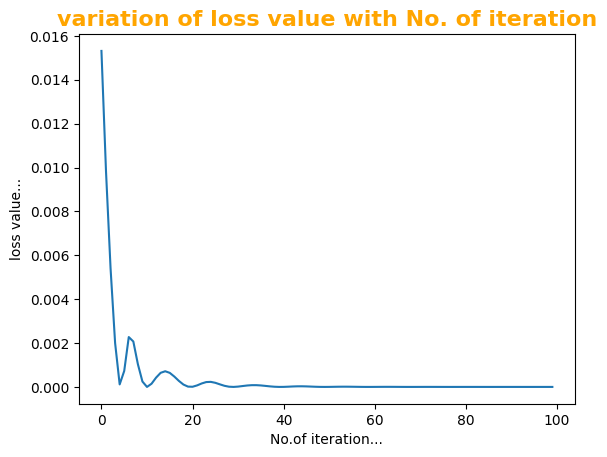

In [51]:
loss=M.history.history['loss']
plt.plot(loss)
plt.xlabel("No.of iteration...")
plt.ylabel("loss value...")
plt.title("variation of loss value with No. of iteration",color="orange",fontsize=16,fontweight="bold");

Through above graph we observe that through the increase in iteration there is the decrease in loss

##### Evaluation of our constructed model on train and test data

In [52]:
train_predict1=M.predict(X_train)

1/1 [==============================] - 3s 3s/step


In [53]:
test_predict1=M.predict(X_test)

1/1 [==============================] - 0s 66ms/step


In [54]:
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

In [55]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict1))

110.88143352433747

In [56]:
math.sqrt(mean_squared_error(y_test,test_predict1))

116.05677206999336

In [57]:
close_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [58]:
train_predict1.shape

(1, 1)

#### Plotting

In [59]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df)-1, :] = test_predict1

Text(0, 0.5, 'closing price')

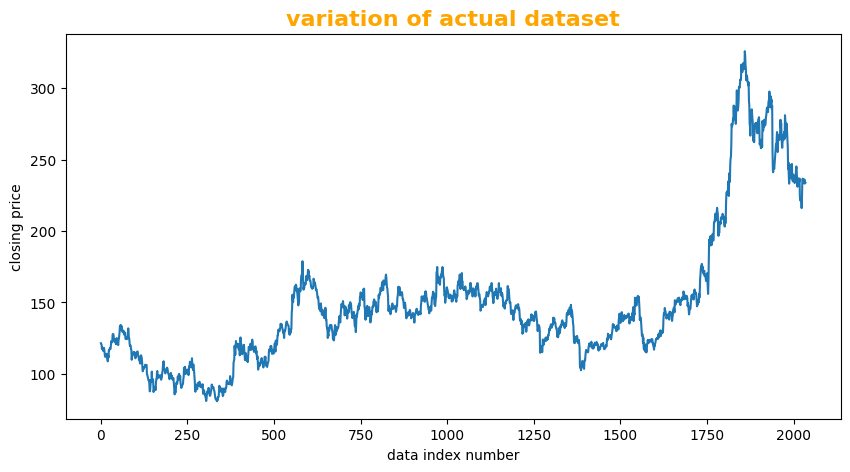

In [60]:
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(close_df))
plt.title("variation of actual dataset",color="orange",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")

Text(0, 0.5, 'closing price')

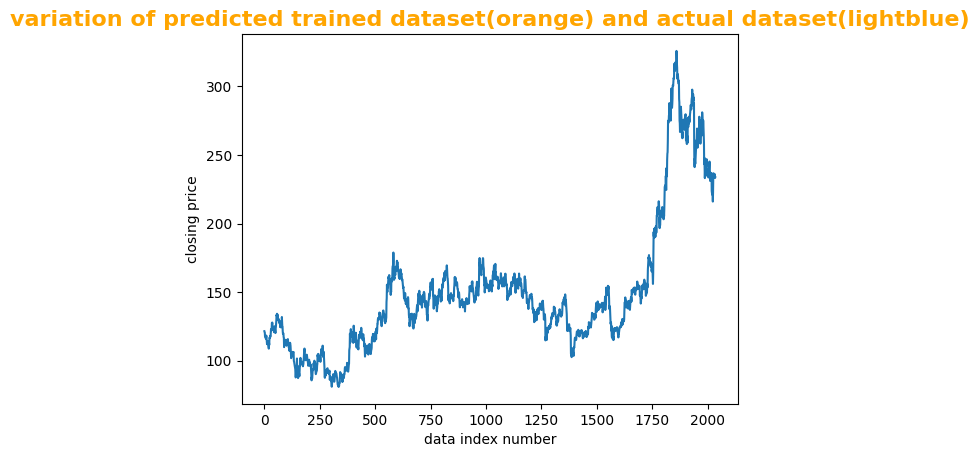

In [61]:
#plot of predictions on closing price made by our model on training dataset vs actual closing price
plt.plot(scaler.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("variation of predicted trained dataset(orange) and actual dataset(lightblue)",color="orange",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")

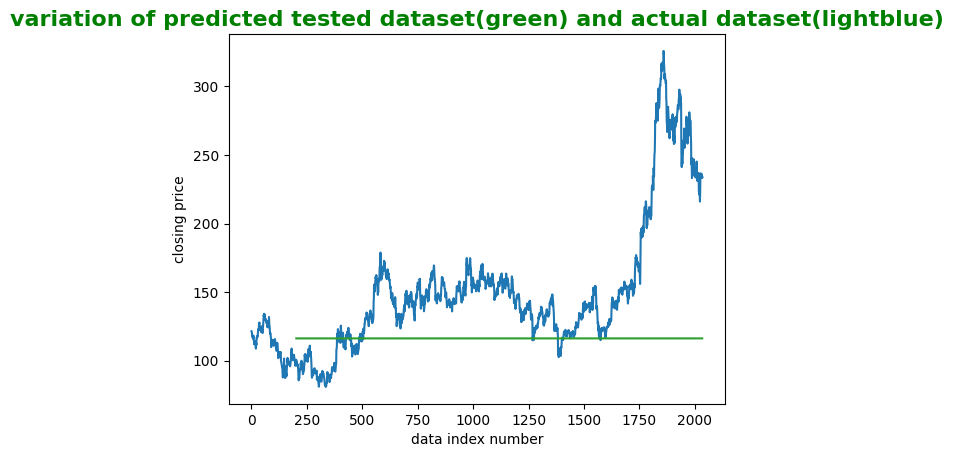

In [62]:

#plot of prediction on closing price made by our model on training dataset vs actual closing price
#vs prediction on closing price made by our model on test dataset
plt.plot(scaler.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.title("variation of predicted tested dataset(green) and actual dataset(lightblue)",color="green",fontsize=16,fontweight="bold")
plt.xlabel("data index number")
plt.ylabel("closing price")
plt.plot(testPredictPlot)
plt.show()

###### since our model trained with first 100 data inputs and start predicting from 101 onwards so orange starts from 101 dataindex no. , similar logic for test data

light blue=-actual closing price

orange=prediction on closing price made by our model on training dataset

green=prediction on closing price made by model on test dataset